# Principal Component Analysis

Similar to feature selection, we can use different feature extraction techniques to reduce the number of features in a dataset. The difference between feature selection and feature extraction is that while we maintain the original features when we use feature selection algorithms, such as sequential backward selection, we use feature extraction to transform or project the data onto a new feature space.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [11]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

In [2]:
wine_url = 'data/wine.data'

wine_df = pd.read_csv(wine_url, header = None)

wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Get the features and output variable
X, y = wine_df.iloc[:, 1:].values, wine_df.iloc[:, 0].values

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 0
                                                    )

# Standardize the features
sc = StandardScaler()

# Get the training and test set
X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

In [4]:
# Covariance Matrix
cov_mat = np.cov(X_train_std.T)

# Eigen values and Eigen Vectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n Eigen values \n', eigen_vals)


 Eigen values 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


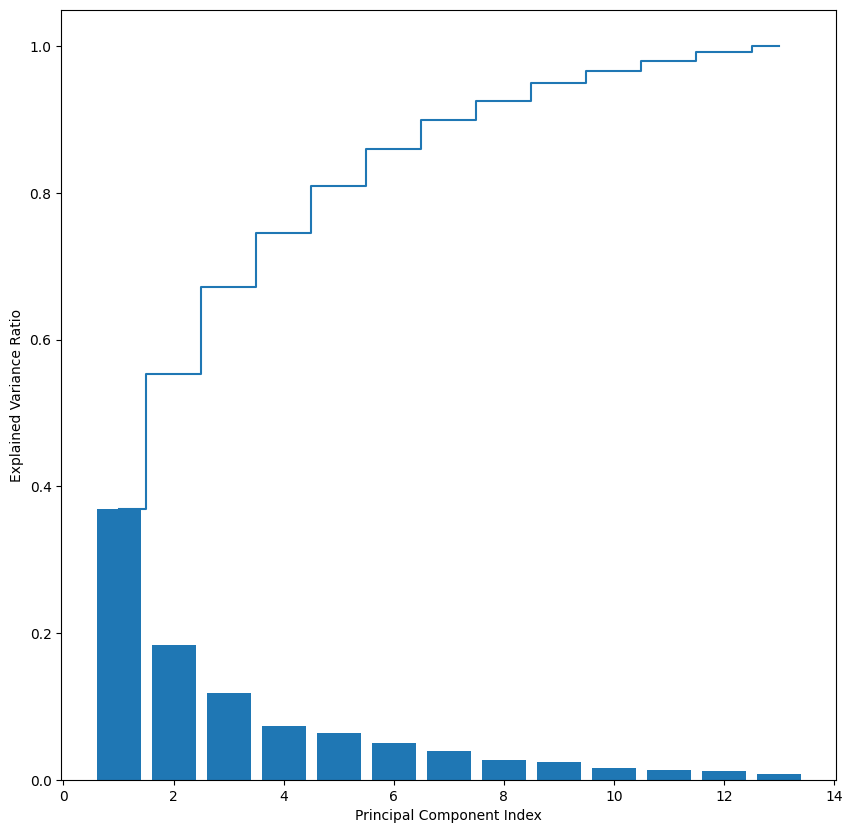

In [5]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)


fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(range(1, 14), var_exp, align='center',
        label = 'Individual Explained Variance')

ax.step(range(1, 14), cum_var_exp, where='mid',
              label = 'Cummulative Explained Variance')

ax.set_ylabel('Explained Variance Ratio')

ax.set_xlabel('Principal Component Index');

> PCA is an unsupervised method, which means that information about the class labels
is ignored. Whereas a random forest uses the class membership information to compute the node
impurities, variance measures the spread of values along a feature axis.

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

print(eigen_pairs)

[(4.842745315655894, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])), (2.416024587035226, array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
        0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
       -0.20716433, -0.24902536,  0.38022942])), (1.5484582488203504, array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
        0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
        0.05305915,  0.13239103, -0.07065022])), (0.9612043774977369, array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
        0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
       -0.36905375,  0.14201609, -0.16768217])), (0.8416616104578426, array([ 0.29062523, -0.08953787,  0.16083499, -0.05158734, -0.67648707,
        0.11851114,  0.10710035,  0.50758161, -0.201

Next, we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60 percent of the variance in this dataset. Note that two eigenvectors have been chosen for the purpose of illustration, since we are going to plot the data via a two-dimensional scatterplot later.


In practice, the number of principal components has to be determined by a tradeoff between
computational efficiency and the performance of the classifier:

In [7]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]
              ))

print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


> transform the entire 124×13-dimensional training dataset onto the two principal
components by calculating the matrix dot product

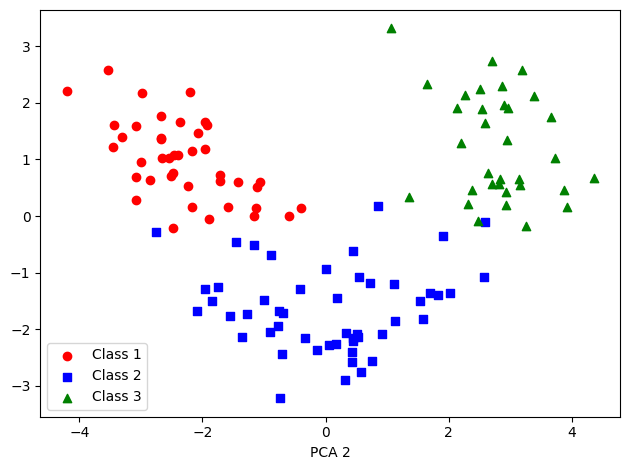

In [8]:
X_train_pca = X_train_std.dot(w)

colors = ['r', 'b', 'g']

markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
    
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

> Keep in mind that PCA is an unsupervised technique that doesn’t use any class
label information.

## PCA with Scikit-learn



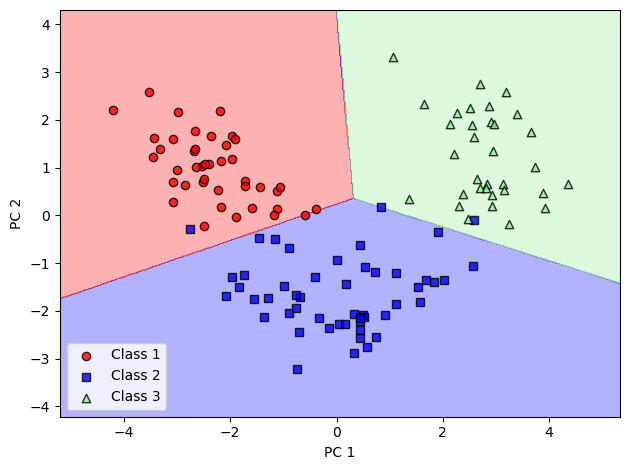

In [13]:
# Initialize the PCA Transformer and LR Estimator


pca = PCA(n_components=2)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# Dimensionality Reduction
X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)


# Fit the LR Model
lr.fit(X_train_pca, y_train)

# Plot the regions
plot_decision_regions(X=X_train_pca, y=y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

> If we are interested in the explained variance ratios of the different principal components, we can
simply initialize the PCA class with the n_components parameter set to None, so all principal components
are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_
attribute:

In [14]:
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## Linear Discriminant Analysis (LDA)

Both PCA and LDA are linear transformation techniques that can be used to reduce the number of dimensions
in a dataset; the former is an unsupervised algorithm, whereas the latter is supervised. Thus,
we might think that LDA is a superior feature extraction technique for classification tasks compared
to PCA.

> However, A.M. Martinez reported that preprocessing via PCA tends to result in better classification
results in an image recognition task in certain cases, for instance, if each class consists of
only a small number of examples

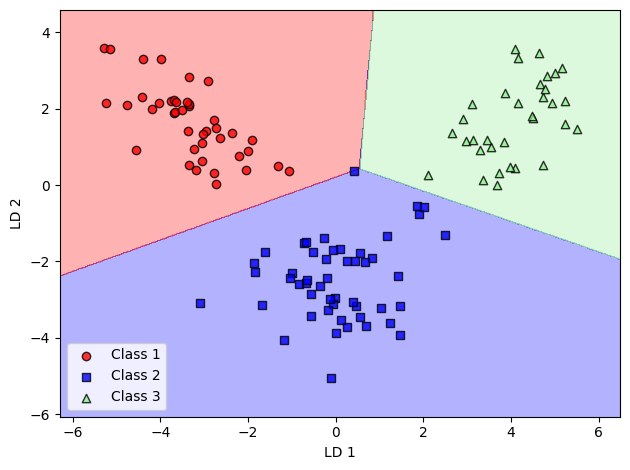

In [18]:
lda = LDA(n_components = 2)

# Main difference b/n LDA and PCA
X_train_lda = lda.fit_transform(X_train_std, y_train)

# Initialize the LR model
lr = LogisticRegression(multi_class='ovr', random_state = 1, solver='lbfgs')


# Fit the LR model
lr = lr.fit(X_train_lda, y_train)


# Plot the regions
plot_decision_regions(X=X_train_lda, y=y_train, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

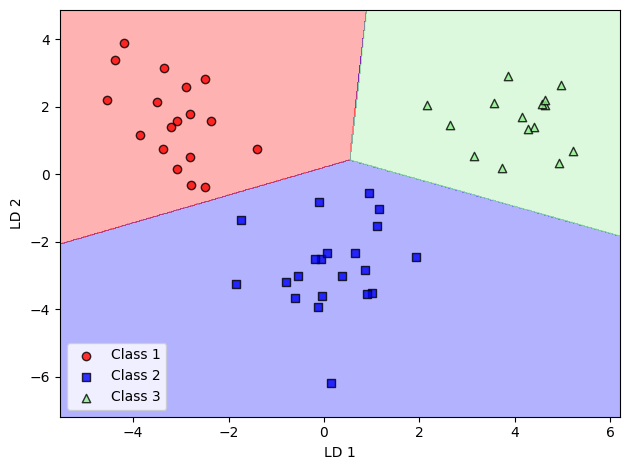

In [24]:
# Test Set LDs
X_test_lda = lda.transform(X_test_std)

# Predictions using the LDA
y_pred = lr.predict(X_test_lda)

# Accuracy of the LDA model
accuracy_score(y_test, y_pred)


# Plot the regions
plot_decision_regions(X=X_test_lda, y=y_test, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()